### Random Sample Imputation

Aim : Random Sample Imputation is similar to mean/median but consist of taking random observation from datasets and use it to replace nan values.

When_to_use : It assumes that the data are missing completely at random (MCAR).


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
data['Age'].dropna().sample(data['Age'].isnull().sum())

663    36.0
350    23.0
696    44.0
160    44.0
399    28.0
       ... 
756    28.0
39     14.0
698    49.0
11     58.0
265    36.0
Name: Age, Length: 177, dtype: float64

In [50]:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [63]:
def impute_nan(df, variable,median):
    data[variable+'_median'] = data[variable].fillna(median)
    data[variable+'_random']= data[variable]
    random_sample = data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [64]:
impute_nan(data,'Age',data.Age.median())

In [65]:
data

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

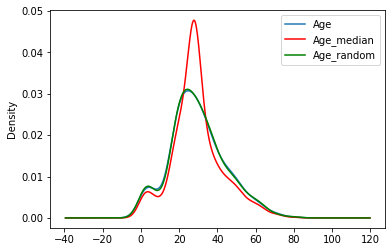

In [66]:
fig = plt.figure()
ax =fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)
data.Age_median.plot(kind='kde',ax=ax,color='red')
data.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantage

1. Easy to implement.
2. No distortion

#### Disadvantage

1. Randomness wont work as it doesnt look towards other data.

### Capturing NaN values with new feature

Works well if Data are not missing completely at random

In [17]:
data_1 = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [18]:
data_1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
import numpy as np
data_1['Age_NaN']=np.where(data_1['Age'].isnull(),1,0)

In [22]:
data_1

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [23]:
data_1['Age'].median()

28.0

In [25]:
data_1['Age'].fillna(data_1.Age.median(),inplace=True)

In [27]:
data_1.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantage:
1. Easy to implement.
2. Captures the importance of missing_value

#### Disadvantage:
1. Creating additional Features. Say if we have 200 features with NaN then it leads to curse of dimensionality.(i.e. works good on smaller set)

### End of Distribution Imputation

In [32]:
data_2 = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
data_2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


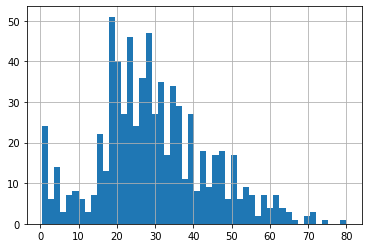

In [34]:
data_2.Age.hist(bins=50)

##### Taking value after the 3rd standard deviation i.e. beyond 99.7% data

In [41]:
extreme=data_2.Age.mean()+3*data_2.Age.std()

In [37]:
import seaborn as sns

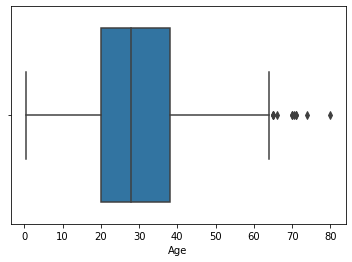

In [39]:
sns.boxplot('Age',data=data_2)

In [40]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [43]:
impute_nan(data_2,'Age',data_2.Age.median(),extreme)

In [44]:
data_2.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


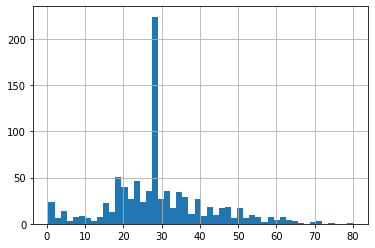

In [45]:
data_2.Age.hist(bins=50)

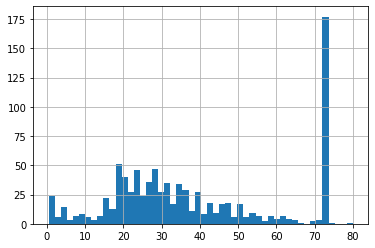

In [46]:
data_2.Age_end_distribution.hist(bins=50)

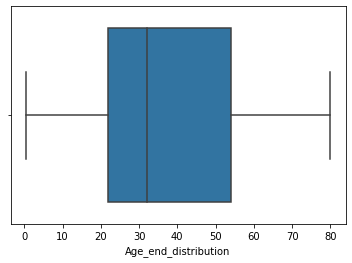

In [47]:
sns.boxplot('Age_end_distribution',data=data_2)

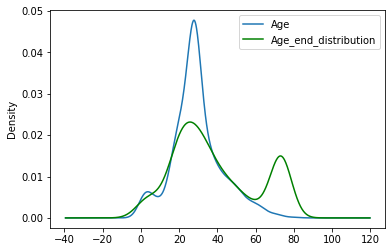

In [49]:
fig = plt.figure()
ax =fig.add_subplot(111)
data_2['Age'].plot(kind='kde',ax=ax)
#data.Age_median.plot(kind='kde',ax=ax,color='red')
data_2.Age_end_distribution.plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantage:
1. Outier Removed.
2. missingness recovered.
#### Disadvantage:
1. Distort the original distribution of variable
2. if missingness is not important, it just mask the predictive power of original variable by distorting the distribution.
